# <center style="font-size:140%;"> Report - Problem Set #*1*
 <center> Group Members:  Giacomo Martiriggiano, Mattia Gallese, Sophie De Becker, Yao Di

This Jupyter Notebook will outline the data cleaning process and Exploratory Data Analysis of customers.csv for Assignment 1

## Preliminary imports
Python will be used to treat data, before starting we need to import all useful module

In [1]:
#import modules needed for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
#read the csv file to transfer all the data into "data"
data = pd.read_csv('customers.csv')


## Cleaning the data
the first step will be to clean the data to check if there are any missing data and if we need to change the data types to facilitate our exploratory data analyis (EDA) 

Let's visualise the type of data for each columns and see first if it would be favorable to convert any of them

In [2]:
pd.set_option("display.max_rows", 20)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd.set_option('display.max_rows', 100)
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.TotalCharges.describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

It appears as though there is an"object" instead of only numbers describing total charges implying that there may be non-digits encoded. Let's filter the nondigit strings to see what data input is causing the problem. This is crucial to know how these values should be treated, for example they could be a number with a typo character or empty spaces that can then in that case be discarded

In [5]:
data_d=data[~data['TotalCharges'].str.replace(".", "", 1).str.isdigit()]
pd.set_option('display.max_rows', None)
data_d.head(data_d.shape[0])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan).astype('float32') 
data["SeniorCitizen"]=data["SeniorCitizen"].astype("object")
#now we forced the 0 and 1 to be objects and we know we can replace the empty values by nan   

Let's check if there are any other empty values, this is done by iterating through every column and checking if a value is empty. However we also check if a values is an empty string object

In [7]:
columns = list(data) 
for i in columns:
    tmp=data[i].isnull().values.any() 
    print("Null value in ", i, "?", tmp)
    c = (data[i] == '').sum()
    print("Number of empty string in ", i, "?", c)

Null value in  customerID ? False
Number of empty string in  customerID ? 0
Null value in  gender ? False
Number of empty string in  gender ? 0
Null value in  SeniorCitizen ? False
Number of empty string in  SeniorCitizen ? 0
Null value in  Partner ? False
Number of empty string in  Partner ? 0
Null value in  Dependents ? False
Number of empty string in  Dependents ? 0
Null value in  tenure ? False
Number of empty string in  tenure ? 0
Null value in  PhoneService ? False
Number of empty string in  PhoneService ? 0
Null value in  MultipleLines ? False
Number of empty string in  MultipleLines ? 0
Null value in  InternetService ? False
Number of empty string in  InternetService ? 0
Null value in  OnlineSecurity ? False
Number of empty string in  OnlineSecurity ? 0
Null value in  OnlineBackup ? False
Number of empty string in  OnlineBackup ? 0
Null value in  DeviceProtection ? False
Number of empty string in  DeviceProtection ? 0
Null value in  TechSupport ? False
Number of empty string in

C:\Users\sophi\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Finally a number may be non-empty but still unrealistic for example negative tenure. Let's now check that tenure and charges are non negative

In [8]:
print((data['tenure'] <0).any())
print((data['TotalCharges']<0).any())
print((data['MonthlyCharges']<0).any())


False
False
False


## Exploratory Data Analysis
We will now explore the impact of different customer characteristics on monthly charges. We are asked only to consider the customer who are "loyal" so we can filter the data by only considering when churn == "No"

In [9]:
datanochurn=data[data['Churn']=='No']

Checking that filtering was carried out as desired.

In [10]:
datanochurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.400024,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.899994,No


## Initial Observations
Before conducting in depth analyses let's visualize how the numerical data is distributed across the client population

In [11]:
number_tot = len(data) #total number of clients
number_negative_churn = len(datanochurn) #number of clients who do NOT leave the company 
perc_negative_tot=number_negative_churn/number_tot
print('Percentage of clients who remain with the company (on the total) = %.3f' % perc_negative_tot)
print('Percentage of clients who leave the company (on the total) = %.3f' % (1-perc_negative_tot))

Percentage of clients who remain with the company (on the total) = 0.735
Percentage of clients who leave the company (on the total) = 0.265


In [12]:
#analize only Object variables
df_obj=datanochurn.select_dtypes(include=['O']) #include only the objects
df_obj=df_obj.drop(columns="customerID") #cancel costumer column

In [13]:
print ("Percentages of the possible values for each single object")
datanochurn_obj = datanochurn.select_dtypes(include=['O'])
datanochurn_obj = datanochurn_obj.drop(columns="customerID")
for c in df_obj.columns:
    print ("\n---- %s ---" % c)
    print (datanochurn[c].value_counts(normalize=True)) #normalize to have the percentage

Percentages of the possible values for each single object

---- gender ---
Male      0.507344
Female    0.492656
Name: gender, dtype: float64

---- SeniorCitizen ---
0    0.871279
1    0.128721
Name: SeniorCitizen, dtype: float64

---- Partner ---
Yes    0.528218
No     0.471782
Name: Partner, dtype: float64

---- Dependents ---
No     0.655199
Yes    0.344801
Name: Dependents, dtype: float64

---- PhoneService ---
Yes    0.901044
No     0.098956
Name: PhoneService, dtype: float64

---- MultipleLines ---
No                  0.491109
Yes                 0.409934
No phone service    0.098956
Name: MultipleLines, dtype: float64

---- InternetService ---
DSL            0.379204
Fiber optic    0.347700
No             0.273096
Name: InternetService, dtype: float64

---- OnlineSecurity ---
No                     0.393699
Yes                    0.333204
No internet service    0.273096
Name: OnlineSecurity, dtype: float64

---- OnlineBackup ---
Yes                    0.368380
No                

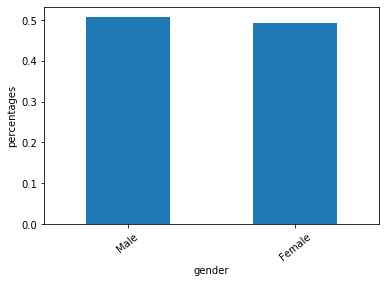

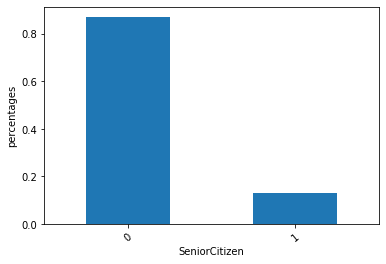

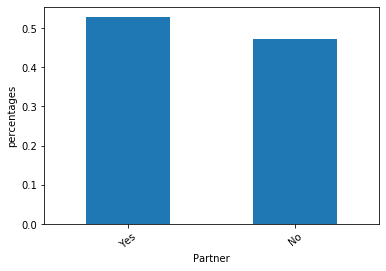

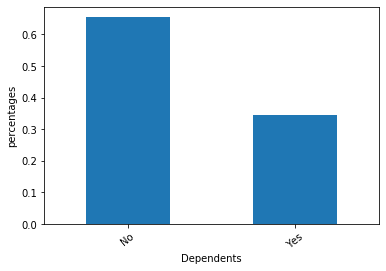

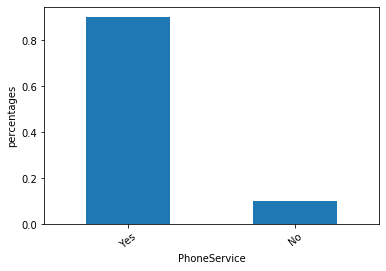

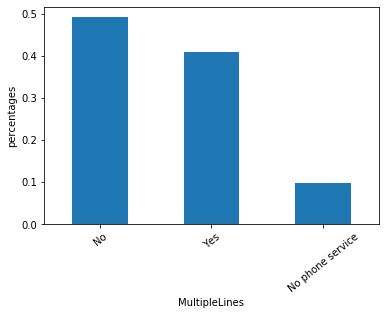

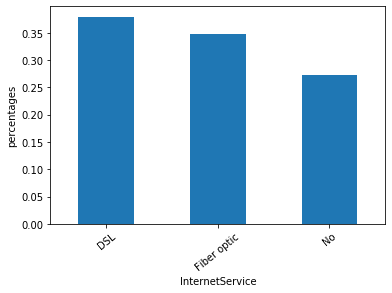

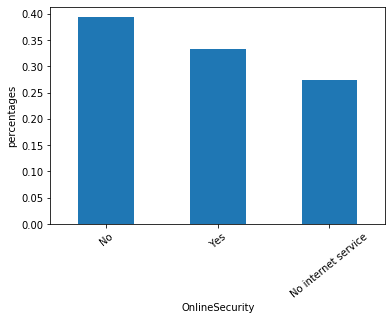

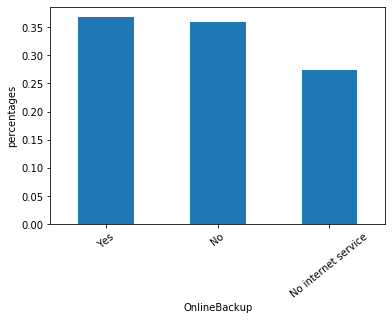

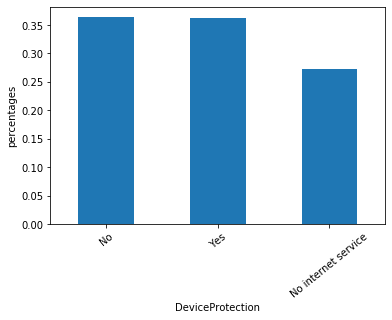

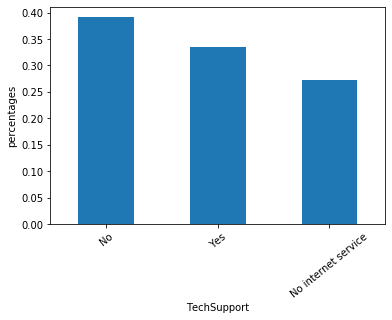

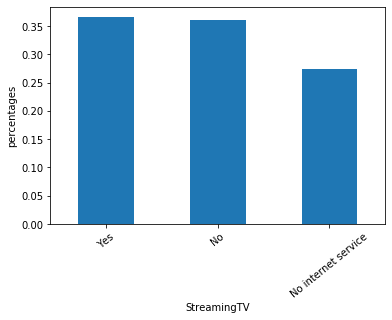

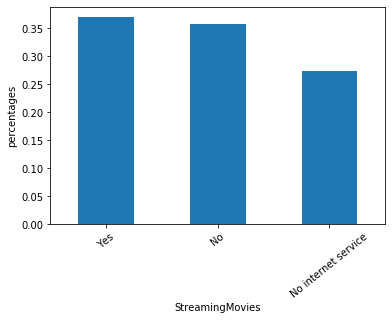

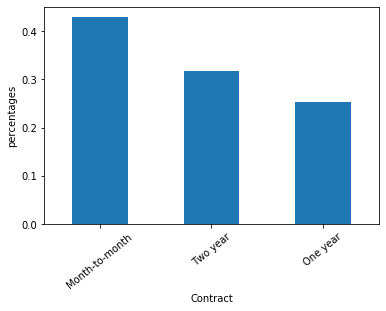

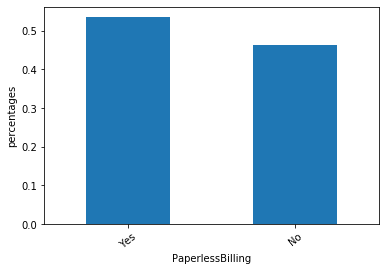

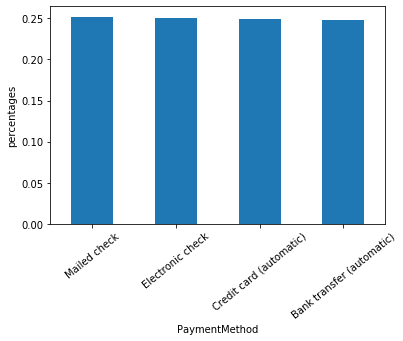

In [14]:
datanochurn_obj_plot = datanochurn_obj.drop(columns="Churn")

#plots:
for c in datanochurn_obj_plot.columns:
    prob = datanochurn_obj_plot[c].value_counts(normalize=True)
    prob.plot(kind='bar',x=c)
    plt.xticks(rotation=39)
    plt.xlabel(c)
    plt.ylabel('percentages')
    plt.show()
    plt.close()

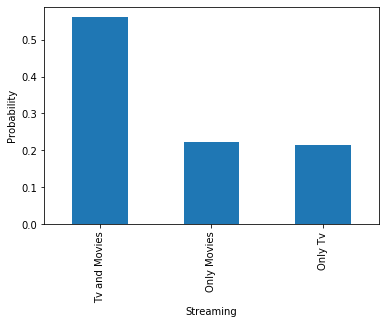

In [15]:
#Creation of a DataFrame describing which clients have streaming Tv and streaming Movies

s=[] #where to save the information for each costumer
for i in datanochurn.index:
    if  (datanochurn.StreamingTV[i] == 'Yes') and (datanochurn.StreamingMovies[i] == 'Yes'): #both
        s += ['Tv and Movies']
    elif (datanochurn.StreamingTV[i] == 'No') and (datanochurn.StreamingMovies[i] == 'Yes'): #only Movies
        s += ['Only Movies']
    elif (datanochurn.StreamingTV[i] == 'Yes') and (datanochurn.StreamingMovies[i] == 'No'): #only tv
        s += ['Only Tv']
        
ss = pd.Series(s) 
prob=ss.value_counts(normalize=True) #count and work in percentage
prob.plot(kind='bar')
plt.xlabel('Streaming')
plt.ylabel('Probability')
plt.show()
plt.close()
#hien per favore aggiungici le percentuali

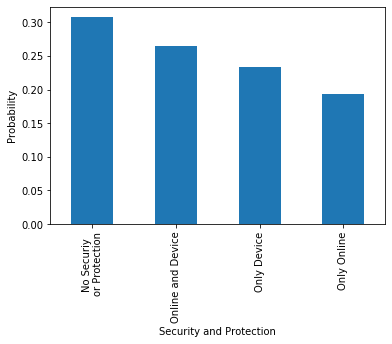

0.3078968359478862


In [16]:
#clients interesed in protection: how many have have online security and/or device protection

s=[] #where to save the information for each costumer
for i in datanochurn.index:
    if (datanochurn.OnlineSecurity[i] == 'Yes') and (datanochurn.DeviceProtection[i] == 'Yes'): #both
        s += ['Online and Device']
    elif (datanochurn.OnlineSecurity[i] == 'Yes') and (datanochurn.DeviceProtection[i] == 'No'): #only Movies
        s += ['Only Online']
    elif (datanochurn.OnlineSecurity[i] == 'No') and (datanochurn.DeviceProtection[i] == 'Yes'): #only tv
        s += ['Only Device']
    elif (datanochurn.OnlineSecurity[i] == 'No') and (datanochurn.DeviceProtection[i] == 'No'): #no
        s += ['No Securiy \nor Protection']
        
ss = pd.Series(s) 
prob=ss.value_counts(normalize=True)  #count and work in percentage
prob.plot(kind='bar')
plt.xlabel('Security and Protection')
plt.ylabel('Probability')
plt.show()
plt.close()

num_NoServicesProtection = s.count('No Securiy \nor Protection')
num_tot = len(s)
perc_NoServicesProtection = num_NoServicesProtection/num_tot
print(perc_NoServicesProtection)

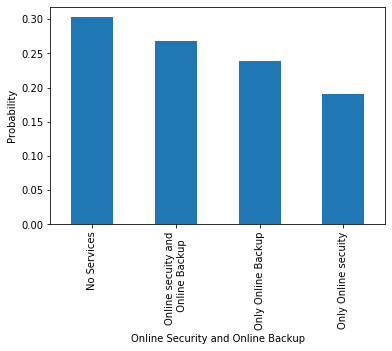

0.302579101302845


In [17]:
#clients interesed in online services: online security and/or online backup

s=[] #where to save the information for each costumer
for i in datanochurn.index:
    if (datanochurn.OnlineSecurity[i] == 'Yes') and (datanochurn.OnlineBackup[i] == 'Yes'): #both
        s += ['Online secuity and\n  Online Backup']
    elif (datanochurn.OnlineSecurity[i] == 'Yes') and (datanochurn.OnlineBackup[i] == 'No'): #only Movies
        s += ['Only Online secuity']
    elif (datanochurn.OnlineSecurity[i] == 'No') and (datanochurn.OnlineBackup[i] == 'Yes'): #only tv
        s += ['Only Online Backup']
    elif (datanochurn.OnlineSecurity[i] == 'No') and (datanochurn.OnlineBackup[i] == 'No'): #no
        s += ['No Services']

ss = pd.Series(s) 
prob=ss.value_counts(normalize=True)  #count and work in percentage
prob.plot(kind='bar')
plt.xlabel('Online Security and Online Backup')
plt.ylabel('Probability')
plt.show()
plt.close()

num_NoServices = s.count('No Services')
num_tot = len(s)
perc_NoServices = num_NoServices/num_tot
print(perc_NoServices)

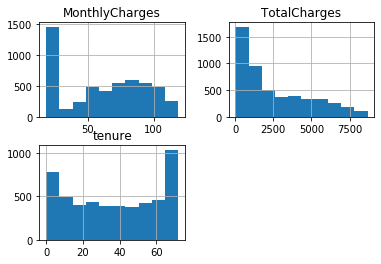

In [18]:
hist = datanochurn.hist(bins=10)

It is immediately apparent that the distribution of values aren't evenly or even symmetrically distributed

## Monthly Charges Analysis
Let's investigate the spread of Monthly Charges using boxplots 

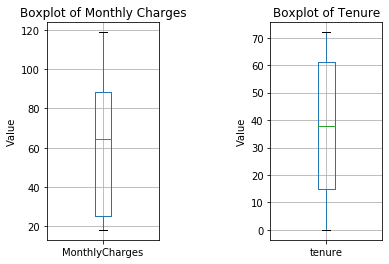

In [35]:
plt.subplots(1,2)
plt.subplot(1,2,1)
datanochurn.boxplot(column=['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.ylabel('Value')
plt.subplot(1,2,2)
datanochurn.boxplot(column=['tenure'])
plt.title('Boxplot of Tenure')
plt.ylabel('Value')
plt.subplots_adjust(wspace=1)

#using boxplots to visualize the spread of monthly charges and tenure amongst clients

Text(0.5, 1.0, 'Tenure Distribution')

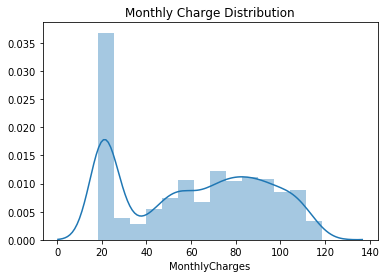

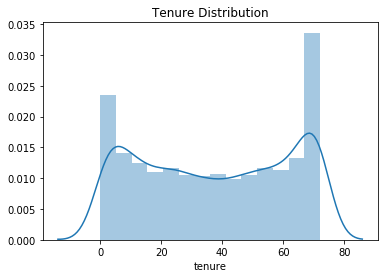

In [20]:
plt.figure()
sns.distplot(datanochurn['MonthlyCharges'])
plt.title('Monthly Charge Distribution')
plt.figure()
sns.distplot(datanochurn['tenure'])
plt.title('Tenure Distribution')
#now let's look at the distribution using histograms for both monthly charges and tenure amongst clients

Observations: we can notice that there is a peak of density at 20. A significant proportion of client base is paying minimum fees. While few pay fees between 30 to 60, there is another peak around 80. So the average MonthlyCharge isn't necesarily representative of an "average customer" but rather an average of two customer types.

## Distibution separated by categories

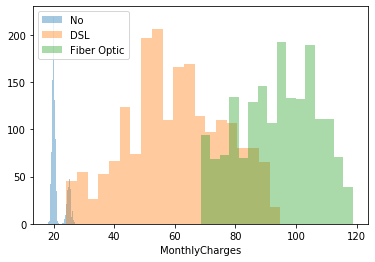

In [21]:
df = datanochurn[datanochurn.InternetService == 'No']
sns.distplot(df['MonthlyCharges'], hist = True, kde = False, label='No')
df = datanochurn[datanochurn.InternetService == 'DSL']
sns.distplot(df['MonthlyCharges'], hist = True, kde = False, label='DSL')
df = datanochurn[datanochurn.InternetService == 'Fiber optic']
sns.distplot(df['MonthlyCharges'], hist = True, kde = False, label='Fiber Optic')
plt.legend()
#now we want to see what happens if we segment customers into different feature

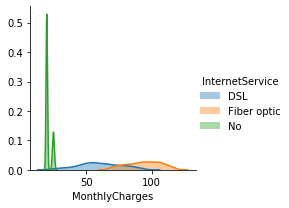

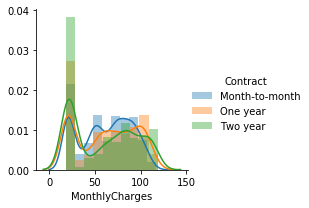

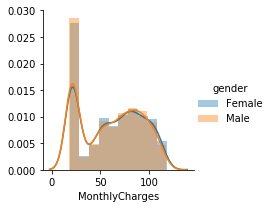

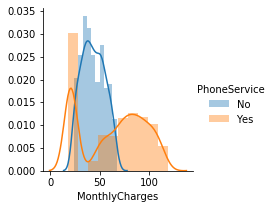

In [22]:

a = sns.FacetGrid(datanochurn, hue='InternetService')
a.map(sns.distplot, 'MonthlyCharges', bins=10, kde=True).add_legend()


b = sns.FacetGrid(datanochurn, hue='Contract')
b.map(sns.distplot, 'MonthlyCharges', bins=10, kde=True).add_legend()


c = sns.FacetGrid(datanochurn, hue='gender')
c.map(sns.distplot, 'MonthlyCharges', bins=10,kde=True).add_legend()

d = sns.FacetGrid(datanochurn, hue='PhoneService')
d.map(sns.distplot, 'MonthlyCharges', bins=10,kde=True).add_legend()

Observations: phone services and internet services seem to be the main drivers in monthly charges distribution differences. WHen you don't have phone service it isn't segmented and depending on which internet service you have your monthly charges are centered around much different values.

### Monthly Charges Vs. Tenure


Text(0, 0.5, 'Monthly Charge')

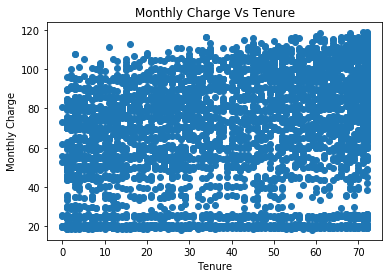

In [24]:
plt.scatter(datanochurn['tenure'], datanochurn['MonthlyCharges'])
plt.title('Monthly Charge Vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charge')

the large number of data clearly is not easily visualized and it is necessary to use averages for unique tenure values

Text(0, 0.5, 'Average Monthly Charge')

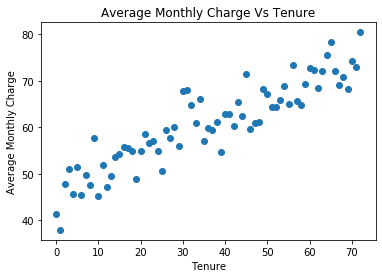

In [25]:
tenure_array=data.tenure.unique()
tenure_array.sort()
avgmc=[]
for i in tenure_array:
    datatemp=datanochurn[datanochurn['tenure']==i]
    meantmp=datatemp['MonthlyCharges'].mean()
    avgmc.append(meantmp)

plt.scatter(tenure_array,avgmc)
plt.title('Average Monthly Charge Vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Average Monthly Charge')
#now we plot the agreggated data and we notice a positive correlation

Text(0.5, 0, 'Internet Service')

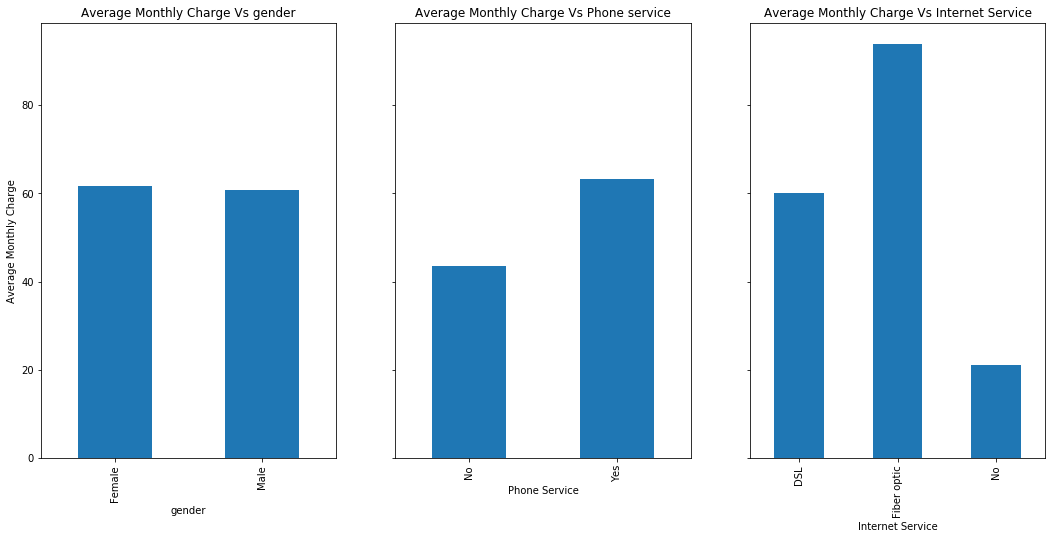

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
plt.axes(axs[0])
datanochurn.groupby('gender')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charge Vs gender')
plt.xlabel('gender')
plt.ylabel('Average Monthly Charge')

plt.axes(axs[1])
datanochurn.groupby('PhoneService')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charge Vs Phone service')
plt.xlabel('Phone Service')


plt.axes(axs[2])
datanochurn.groupby('InternetService')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charge Vs Internet Service')
plt.xlabel('Internet Service')
#bar plots of averages are used to see what might effect average


It seems obvious that phone service and internet service result in higher average monthly charges. Perhaps tenure clients possess more of these characteristics. Let's check by comparing average tenures.

Text(0.5, 0, 'Internet Service')

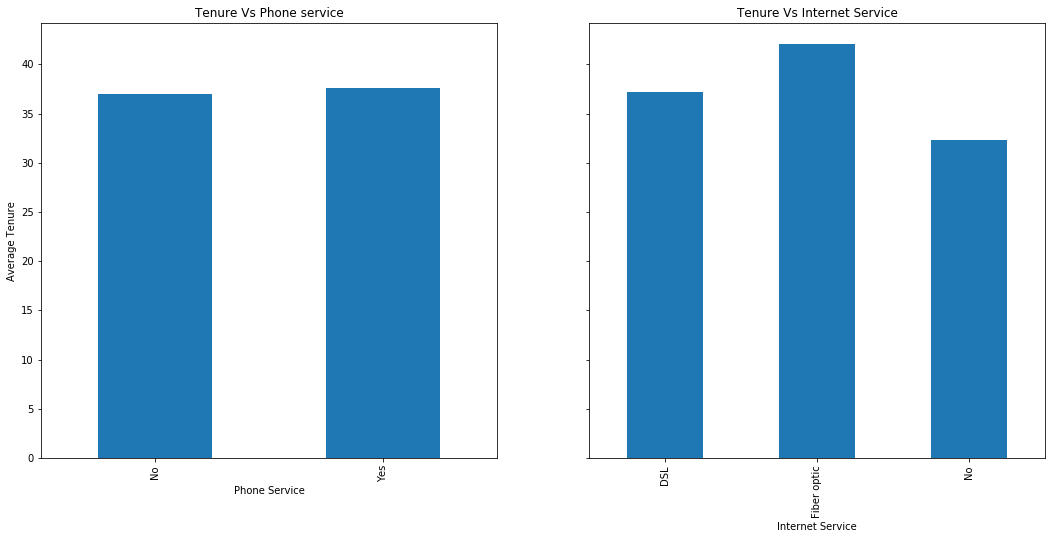

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

plt.axes(axs[0])
datanochurn.groupby('PhoneService')['tenure'].mean().plot(kind='bar')
plt.title('Tenure Vs Phone service')
plt.xlabel('Phone Service')
plt.ylabel('Average Tenure')

plt.axes(axs[1])
datanochurn.groupby('InternetService')['tenure'].mean().plot(kind='bar')
plt.title('Tenure Vs Internet Service')
plt.xlabel('Internet Service')
#let's see the average tnure as a function of different services used


### Bar plots

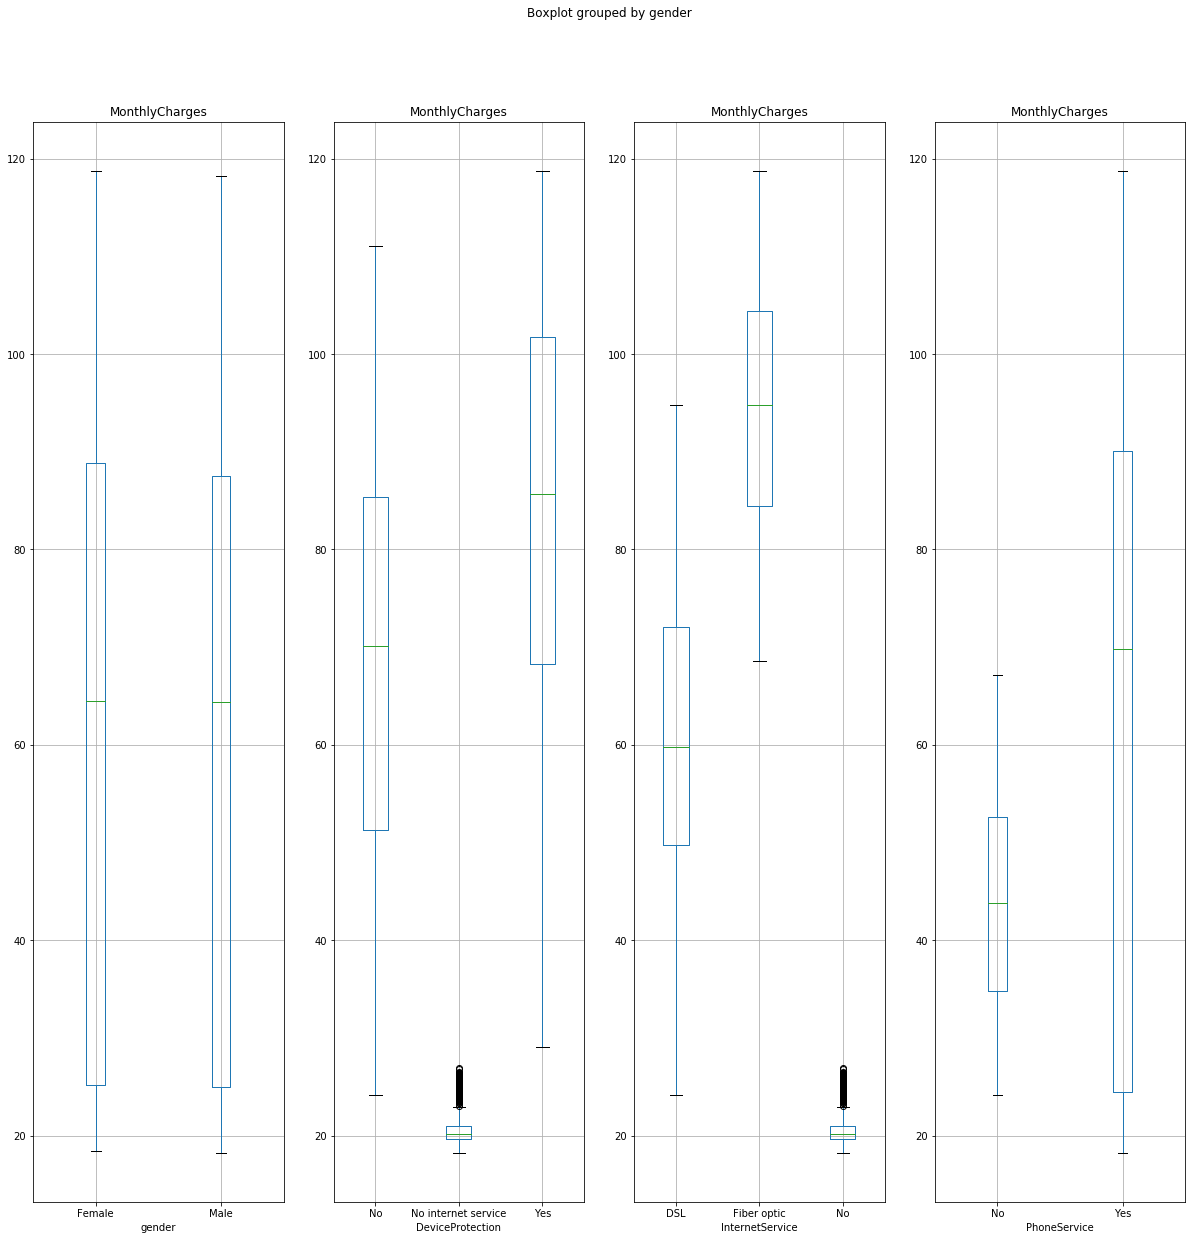

In [28]:
fig, axs=plt.subplots(1,4,figsize=(20, 20))
datanochurn.boxplot(column=['MonthlyCharges'],by='DeviceProtection',ax=axs[1])
datanochurn.boxplot(column=['MonthlyCharges'],by='InternetService',ax=axs[2])
datanochurn.boxplot(column=['MonthlyCharges'],by='PhoneService',ax=axs[3])
datanochurn.boxplot(column=['MonthlyCharges'],by='gender',ax=axs[0])
#now we will plot more bar plots to visualize specific spreads of different characteristics


### Alternative format for bar plots

Text(0.5, 0, 'Internet Service')

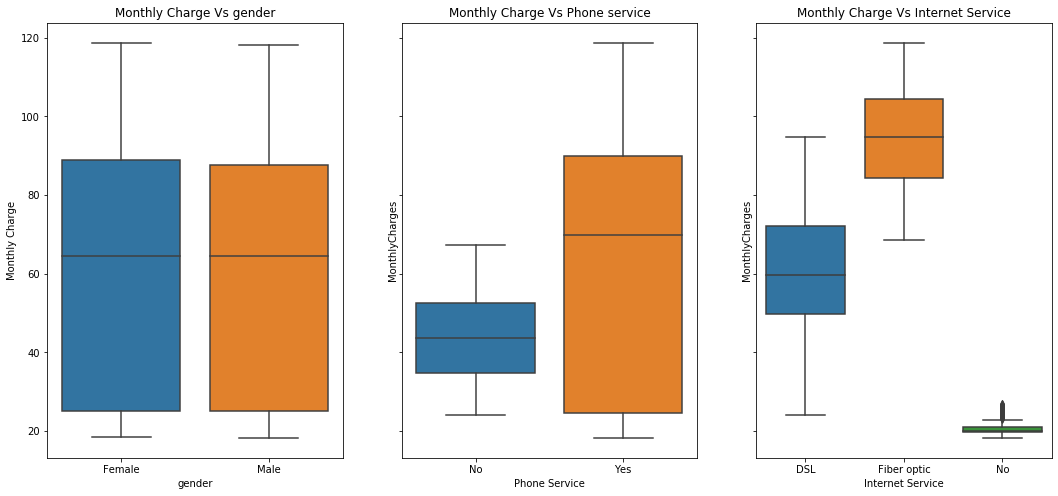

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
plt.axes(axs[0])
sns.boxplot(x='gender', y='MonthlyCharges', data=datanochurn)
plt.title('Monthly Charge Vs gender')
plt.xlabel('gender')
plt.ylabel('Monthly Charge')

plt.axes(axs[1])
sns.boxplot(x='PhoneService', y='MonthlyCharges', data=datanochurn)
plt.title('Monthly Charge Vs Phone service')
plt.xlabel('Phone Service')


plt.axes(axs[2])
sns.boxplot(x='InternetService', y='MonthlyCharges', data=datanochurn)
plt.title('Monthly Charge Vs Internet Service')
plt.xlabel('Internet Service')

Text(0.5, 0, 'Internet Service')

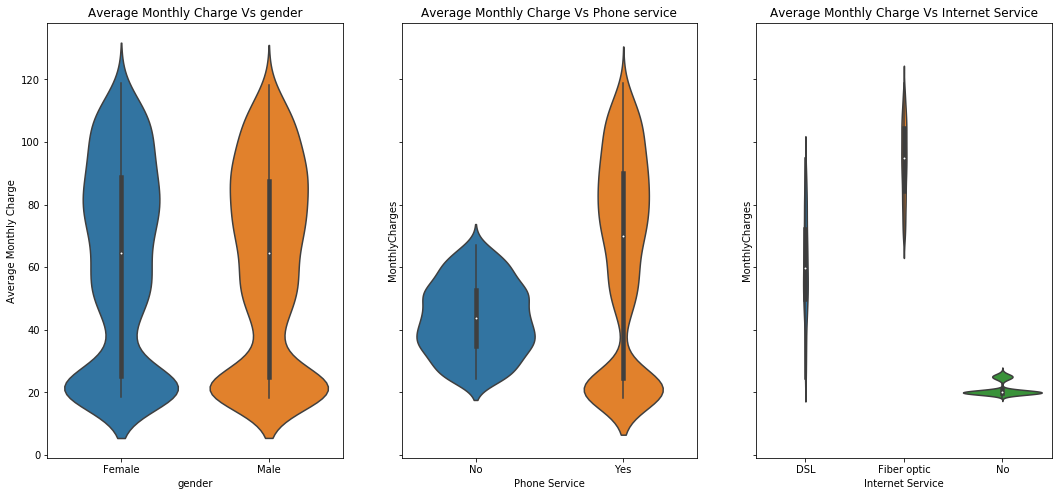

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
plt.axes(axs[0])
sns.violinplot(x='gender', y='MonthlyCharges', data=datanochurn)
plt.title('Average Monthly Charge Vs gender')
plt.xlabel('gender')
plt.ylabel('Average Monthly Charge')

plt.axes(axs[1])
sns.violinplot(x='PhoneService', y='MonthlyCharges', data=datanochurn)
plt.title('Average Monthly Charge Vs Phone service')
plt.xlabel('Phone Service')


plt.axes(axs[2])
sns.violinplot(x='InternetService', y='MonthlyCharges', data=datanochurn)
plt.title('Average Monthly Charge Vs Internet Service')
plt.xlabel('Internet Service')
#these plots help visualize distribution 

It looks like maybe the customer based can be segmented within phone service, perhaps there is a cheap and an expensive phone plan. It could however also caused by a portion of phone service usersnot using internet but another portion is using internet.

### Frequency Counts

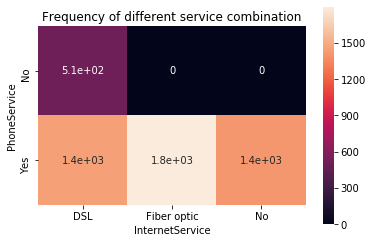

<Figure size 432x288 with 0 Axes>

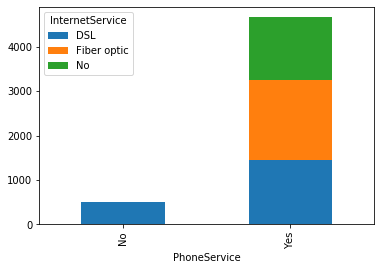

In [31]:
hm=pd.crosstab(datanochurn.PhoneService, datanochurn.InternetService)
plt.figure()
plt.title('Frequency of different service combination')
s1=sns.heatmap(hm, annot=True)
s1.set_aspect("equal")
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)
plt.figure()
hm.plot.bar(stacked=True)

#this plot helps see how the customer base is segmented in terms of combinations of sevices used

### Jointplot

<Figure size 432x288 with 0 Axes>

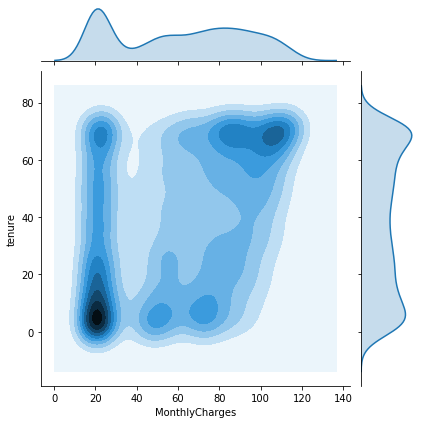

In [32]:
plt.figure()
sns.jointplot(x="MonthlyCharges", y="tenure", data=datanochurn, kind="kde");

## Correlation

(3.0, 0.0)

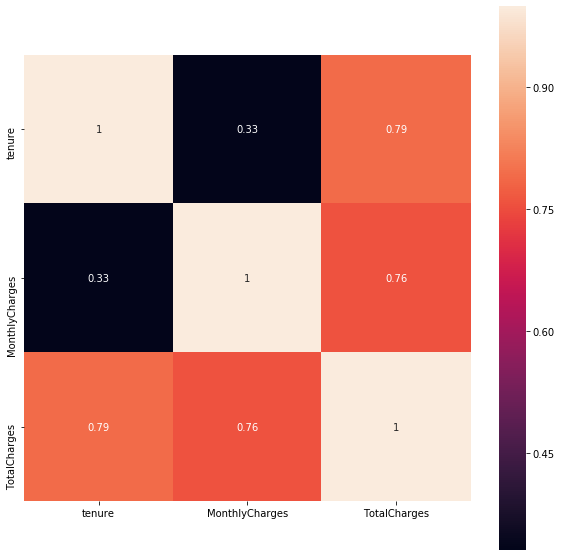

In [33]:
corr = datanochurn.corr()
plt.figure(figsize=(10,10))
s1=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
s1.set_aspect("equal")
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)
